# Lab | Web Scraping Multiple Pages
Business goal:
Check the case_study_gnod.md file.

Make sure you've understood the big picture of your project:

the goal of the company (Gnod),
their current product (Gnoosic),
their strategy, and
how your project fits into this context.
Re-read the business case and the e-mail from the CTO, take a look at the flowchart and create an initial Trello board with the tasks you think you'll have to accomplish.

Instructions
Prioritize the MVP
In the previous lab, you had to scrape data about "hot songs". It's critical to be on track with that part, as it was part of the request from the CTO.

If you couldn't finish the first lab, use this time to go back there.

Expand the project
If you're done, you can try to expand the project on your own. Here are a few suggestions:

Find other lists of hot songs on the internet and scrape them too: having a bigger pool of songs will be awesome!
Apply the same logic to other "groups" of songs: the best songs from a decade or from a country / culture / language / genre.
Wikipedia maintains a large collection of lists of songs: https://en.wikipedia.org/wiki/Lists_of_songs

In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

In [2]:
url = "https://www.billboard.com/charts/hot-100"

In [3]:
response = requests.get(url)
response.status_code

200

In [4]:
soup = BeautifulSoup(response.content, "html.parser")
soup

<!DOCTYPE html>

<html class="" lang="">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, user-scalable=no" name="viewport"/>
<title>The Hot 100 Chart | Billboard</title>
<meta content="The Hot 100 Chart" name="title" property="title">
<meta content="@billboard" name="twitter:site"/>
<meta content="Billboard" property="og:site_name">
<meta content="article" property="og:type">
<link href="/manifest.json" rel="manifest"/>
<style>
        .chart-pro-access {
            background-image: url('https://www.billboard.com/assets/1614041119/images/piano/chart-pro-access-mb.png?dd942eb525ee970e932a');
        }

        @media (min-width: 769px) {
            .chart-pro-access {
                background-image: url('https://www.billboard.com/assets/1614041119/images/piano/chart-pro-access-dk.png?dd942eb525ee970e932a');
            }
        }
    </style>
<script async="async" data-cfasync="false" src="ht

In [5]:
# song ".chart-element__information__song"
# artist ".chart-element__information__artist"

In [6]:
#num_iter = len(soup.select("span.chart-element a"))

In [7]:
soup.find_all("span", class_= "chart-element__information__song")

[<span class="chart-element__information__song text--truncate color--primary">Drivers License</span>,
 <span class="chart-element__information__song text--truncate color--primary">34+35</span>,
 <span class="chart-element__information__song text--truncate color--primary">Calling My Phone</span>,
 <span class="chart-element__information__song text--truncate color--primary">Blinding Lights</span>,
 <span class="chart-element__information__song text--truncate color--primary">Up</span>,
 <span class="chart-element__information__song text--truncate color--primary">Save Your Tears</span>,
 <span class="chart-element__information__song text--truncate color--primary">Mood</span>,
 <span class="chart-element__information__song text--truncate color--primary">Go Crazy</span>,
 <span class="chart-element__information__song text--truncate color--primary">Levitating</span>,
 <span class="chart-element__information__song text--truncate color--primary">Positions</span>,
 <span class="chart-element__in

In [8]:
song = []
artist = []
#weeks_on_chart = []
#soup.find_all("span", class_= "chart-element__information__song")

In [9]:
num_iter = len(soup.select("ol li"))

# iterate through the result set and retrive all the data
for i in range(num_iter):
    song.append(soup.select(".chart-element__information__song")[i].get_text())
    artist.append(soup.select(".chart-element__information__artist")[i].get_text())

In [10]:
print(song)

['Drivers License', '34+35', 'Calling My Phone', 'Blinding Lights', 'Up', 'Save Your Tears', 'Mood', 'Go Crazy', 'Levitating', 'Positions', "Love Story (Taylor's Version)", 'What You Know Bout Love', 'Therefore I Am', 'For The Night', 'Whoopty', 'Back In Blood', 'Holy', 'Good Days', 'I Hope', 'Better Together', 'Dakiti', 'Lonely', 'You Broke Me First.', "You're Mines Still", 'Willow', 'Body', 'Streets', 'Anyone', "My Ex's Best Friend", 'Throat Baby (Go Baby)', 'Bang!', 'On Me', 'Before You Go', 'Lemonade', 'Good Time', 'Laugh Now Cry Later', 'Starting Over', 'Best Friend', 'Put Your Records On', 'Just The Way', 'Cry Baby', 'Beers And Sunshine', 'Without You', 'Damage', 'Dynamite', 'Down To One', 'Buss It', 'Long Live', "We're Good", 'Time Today', 'What It Feels Like', 'Hole In The Bottle', 'Wasted On You', 'Beat Box', 'The Good Ones', "What's Your Country Song", 'Sand In My Boots', 'Golden', 'Monsters', 'Goosebumps', 'My Head And My Heart', 'Tyler Herro', 'Lady', 'Heat Waves', 'Aftergl

In [11]:
artist

['Olivia Rodrigo',
 'Ariana Grande',
 'Lil Tjay Featuring 6LACK',
 'The Weeknd',
 'Cardi B',
 'The Weeknd',
 '24kGoldn Featuring iann dior',
 'Chris Brown & Young Thug',
 'Dua Lipa Featuring DaBaby',
 'Ariana Grande',
 'Taylor Swift',
 'Pop Smoke',
 'Billie Eilish',
 'Pop Smoke Featuring Lil Baby & DaBaby',
 'CJ',
 'Pooh Shiesty Featuring Lil Durk',
 'Justin Bieber Featuring Chance The Rapper',
 'SZA',
 'Gabby Barrett Featuring Charlie Puth',
 'Luke Combs',
 'Bad Bunny & Jhay Cortez',
 'Justin Bieber & benny blanco',
 'Tate McRae',
 'Yung Bleu Featuring Drake',
 'Taylor Swift',
 'Megan Thee Stallion',
 'Doja Cat',
 'Justin Bieber',
 'Machine Gun Kelly X blackbear',
 'BRS Kash',
 'AJR',
 'Lil Baby',
 'Lewis Capaldi',
 'Internet Money & Gunna Featuring Don Toliver & NAV',
 'Niko Moon',
 'Drake Featuring Lil Durk',
 'Chris Stapleton',
 'Saweetie Featuring Doja Cat',
 'Ritt Momney',
 'Parmalee x Blanco Brown',
 'Megan Thee Stallion Featuring DaBaby',
 'Darius Rucker',
 'The Kid LAROI',
 'H

In [12]:
billboard = pd.DataFrame({'artist': artist, 'song': song})

In [13]:
billboard.index += 1

In [14]:
billboard

artist                   song
1                    Olivia Rodrigo        Drivers License
2                     Ariana Grande                  34+35
3          Lil Tjay Featuring 6LACK       Calling My Phone
4                        The Weeknd        Blinding Lights
5                           Cardi B                     Up
..                              ...                    ...
96                     Jordan Davis          Almost Maybes
97    Saweetie Featuring Jhene Aiko    Back To The Streets
98          Juice WRLD & Young Thug                Bad Boy
99   YBN Nahmir Featuring 21 Savage             Opp Stoppa
100                   Rascal Flatts  How They Remember You

[100 rows x 2 columns]

# Scraping more songs to the list

In [15]:
url2 = 'http://www.popvortex.com/music/charts/top-100-songs.php'

In [16]:
response = requests.get(url2)
response

<Response [200]>

In [17]:
soup2 = BeautifulSoup(response.content, "html.parser")
soup2

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><title>iTunes Top 100 Songs Chart 2021</title><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="iTunes top 100 songs chart list. The most popular hit music and trending songs of 2021. Chart of today's current iTunes top 100 songs is updated daily." name="description"/><meta content="iTunes Top 100 Songs Chart 2021" property="og:title"><meta content="Chart of the top 100 songs on iTunes. Chart list of the top 100 song downloads of 2021 is updated daily." property="og:description"><meta content="article" property="og:type"><meta content="http://www.popvortex.com/images/logo-facebook.png" property="og:image"/><meta content="PopVortex" property="og:site_name"/><meta content="http://www.popvortex.com/music/charts/top-100-songs.php" property="og:url"/><meta content="100000239962942" property="fb:admins"/><meta content="178831188827052" property="fb:app_id"/><link href="/favicon.png" rel="shortcut i

In [18]:
#chart-position-1 > div.chart-content.col-xs-12.col-sm-8 > p > cite

In [19]:
#song title

In [20]:
soup2.select(" div.chart-content.col-xs-12.col-sm-8 > p > cite")[0].get_text()

'drivers license'

In [21]:
#artists

In [22]:
soup2.select("#chart-position-1 > div.chart-content.col-xs-12.col-sm-8 > p > em")[0].get_text()

'Olivia Rodrigo'

In [23]:
soup2.find_all(class_="title-artist")

[<p class="title-artist"><cite class="title">drivers license</cite><em class="artist">Olivia Rodrigo</em></p>,
 <p class="title-artist"><cite class="title">Up</cite><em class="artist">Cardi B</em></p>,
 <p class="title-artist"><cite class="title">Hold On To Me</cite><em class="artist">Lauren Daigle</em></p>,
 <p class="title-artist"><cite class="title">Astronaut In The Ocean</cite><em class="artist">Masked Wolf</em></p>,
 <p class="title-artist"><cite class="title">Rise Up</cite><em class="artist">Andra Day</em></p>,
 <p class="title-artist"><cite class="title">Blinding Lights</cite><em class="artist">The Weeknd</em></p>,
 <p class="title-artist"><cite class="title">Only Wanna Be With You (Pokémon 25 Version)</cite><em class="artist">Post Malone</em></p>,
 <p class="title-artist"><cite class="title">She Broke My Heart</cite><em class="artist">Noah Schnacky</em></p>,
 <p class="title-artist"><cite class="title">Drunk (And I Don't Wanna Go Home)</cite><em class="artist">Elle King &amp; M

In [24]:
songs2 = []
artists2 = []
for i in range(100):
    #soup2.select("title-artist > title")[i].get_text()
    #soup2.select("title-artist > artist")[i].get_text()
    songs2.append(soup2.select(".title-artist > .title")[i].get_text())
    artists2.append(soup2.select(".title-artist > .artist")[i].get_text())

In [25]:
songs2

['drivers license',
 'Up',
 'Hold On To Me',
 'Astronaut In The Ocean',
 'Rise Up',
 'Blinding Lights',
 'Only Wanna Be With You (Pokémon 25 Version)',
 'She Broke My Heart',
 "Drunk (And I Don't Wanna Go Home)",
 'No Diggity (feat. Dr. Dre & Queen Pen)',
 'Agatha All Along (feat. Kathryn Hahn, Eric Bradley, Greg Whipple, Jasper Randall & Gerald White)',
 'Somebody Does',
 'My Head & My Heart',
 'Everything I Own',
 'Anyone',
 'Best Friend (feat. Doja Cat)',
 'The Good Ones',
 'Save Your Tears',
 'Levitating (feat. DaBaby)',
 'My Girl',
 'you broke me first',
 'Therefore I Am',
 'GOOD TIME',
 'Spaceman',
 'Inner Child',
 'Starting Over',
 'WITHOUT YOU',
 "my ex's best friend",
 'All My Life',
 'Wonder',
 "Til It Wasn't",
 "Don't Start Now",
 'Cover Me In Sunshine',
 "(Sittin' On) The Dock of the Bay",
 'CLOUDS',
 "Opportunities (Let's Make Lots of Money) [2001 Remaster]",
 'Bang!',
 'Better Together',
 'Help Is On The Way (Maybe Midnight)',
 'Poison',
 'Wasted On You',
 "It Wasn't Me (

In [26]:
artists2

['Olivia Rodrigo',
 'Cardi B',
 'Lauren Daigle',
 'Masked Wolf',
 'Andra Day',
 'The Weeknd',
 'Post Malone',
 'Noah Schnacky',
 'Elle King & Miranda Lambert',
 'Blackstreet',
 'Kristen Anderson-Lopez & Robert Lopez',
 'Tigirlily',
 'Ava Max',
 'Bread',
 'Justin Bieber',
 'Saweetie',
 'Gabby Barrett',
 'The Weeknd',
 'Dua Lipa',
 'The Temptations',
 'Tate McRae',
 'Billie Eilish',
 'Niko Moon',
 'Nick Jonas',
 'BTS',
 'Chris Stapleton',
 'The Kid LAROI',
 'Machine Gun Kelly & blackbear',
 'K-Ci & JoJo',
 'Megan Moroney',
 'Chris Ruediger',
 'Dua Lipa',
 'P!nk & Willow Sage Hart',
 'Otis Redding',
 'NF',
 'Pet Shop Boys',
 'AJR',
 'Luke Combs',
 'TobyMac',
 'Bell Biv DeVoe',
 'Morgan Wallen',
 'Shaggy',
 'Ed Sheeran',
 'Taylor Swift',
 'Thomas Rhett',
 '24kGoldn',
 'Olivia Rodrigo',
 'Dua Lipa',
 'H.E.R.',
 'Rick James',
 'Jason Derulo',
 'Nu Breed & Jesse Howard',
 'Glass Animals',
 'Stevie Wonder',
 'Kool & The Gang',
 'Chris Stapleton',
 'Megan Thee Stallion',
 'Luke Bryan',
 'Pop Sm

In [27]:
more_songs = pd.DataFrame({'artist': artists2, 'song': songs2})

In [28]:
more_songs.index += 1
more_songs

artist                    song
1           Olivia Rodrigo         drivers license
2                  Cardi B                      Up
3            Lauren Daigle           Hold On To Me
4              Masked Wolf  Astronaut In The Ocean
5                Andra Day                 Rise Up
..                     ...                     ...
96             Ritt Momney     Put Your Records On
97   The Mamas & The Papas     California Dreamin'
98             Boyz II Men         End of the Road
99            Carly Pearce  Should’ve Known Better
100              Lee Brice                    Soul

[100 rows x 2 columns]

# Getting the final list of hot songs

In [29]:
big_list = pd.concat([billboard, more_songs], ignore_index=True, sort=False)

In [30]:
big_list=big_list.drop_duplicates()

In [31]:
big_list.index +=1

In [32]:
big_list

artist                    song
1              Olivia Rodrigo         Drivers License
2               Ariana Grande                   34+35
3    Lil Tjay Featuring 6LACK        Calling My Phone
4                  The Weeknd         Blinding Lights
5                     Cardi B                      Up
..                        ...                     ...
195       Bad Bunny & ROSALÍA      LA NOCHE DE ANOCHE
197     The Mamas & The Papas     California Dreamin'
198               Boyz II Men         End of the Road
199              Carly Pearce  Should’ve Known Better
200                 Lee Brice                    Soul

[174 rows x 2 columns]

# Lab | API wrappers - Create your collection of songs & audio features
Instructions
To move forward with the project, you need to create a collection of songs with their audio features - as large as possible!

These are the songs that we will cluster. And, later, when the user inputs a song, we will find the cluster to which the song belongs and recommend a song from the same cluster. The more songs you have, the more accurate and diverse recommendations you'll be able to give. Although... you might want to make sure the collected songs are "curated" in a certain way. Try to find playlists of songs that are diverse, but also that meet certain standards.

The process of sending hundreds or thousands of requests can take some time - it's normal if you have to wait a few minutes (or, if you're ambitious, even hours) to get all the data you need.

An idea for collecting as many songs as possible is to start with all the songs of a big, diverse playlist and then go to every artist present in the playlist and grab every song of every album of that artist. The amount of songs you'll be collecting per playlist will grow exponentially!

In [33]:
len(big_list['song'].unique())

172

In [34]:
pd.DataFrame(big_list)

artist                    song
1              Olivia Rodrigo         Drivers License
2               Ariana Grande                   34+35
3    Lil Tjay Featuring 6LACK        Calling My Phone
4                  The Weeknd         Blinding Lights
5                     Cardi B                      Up
..                        ...                     ...
195       Bad Bunny & ROSALÍA      LA NOCHE DE ANOCHE
197     The Mamas & The Papas     California Dreamin'
198               Boyz II Men         End of the Road
199              Carly Pearce  Should’ve Known Better
200                 Lee Brice                    Soul

[174 rows x 2 columns]

# Getting the features of the songs

In [35]:
from config import *

In [36]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

In [37]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= Client_ID,
                                                           client_secret= Client_Secret))

In [38]:
big_list['song'].unique()

array(['Drivers License', '34+35', 'Calling My Phone', 'Blinding Lights',
       'Up', 'Save Your Tears', 'Mood', 'Go Crazy', 'Levitating',
       'Positions', "Love Story (Taylor's Version)",
       'What You Know Bout Love', 'Therefore I Am', 'For The Night',
       'Whoopty', 'Back In Blood', 'Holy', 'Good Days', 'I Hope',
       'Better Together', 'Dakiti', 'Lonely', 'You Broke Me First.',
       "You're Mines Still", 'Willow', 'Body', 'Streets', 'Anyone',
       "My Ex's Best Friend", 'Throat Baby (Go Baby)', 'Bang!', 'On Me',
       'Before You Go', 'Lemonade', 'Good Time', 'Laugh Now Cry Later',
       'Starting Over', 'Best Friend', 'Put Your Records On',
       'Just The Way', 'Cry Baby', 'Beers And Sunshine', 'Without You',
       'Damage', 'Dynamite', 'Down To One', 'Buss It', 'Long Live',
       "We're Good", 'Time Today', 'What It Feels Like',
       'Hole In The Bottle', 'Wasted On You', 'Beat Box', 'The Good Ones',
       "What's Your Country Song", 'Sand In My Boots', '

In [39]:
#testing the spotify search on one song

In [40]:
song_test=sp.search(q='Wine, Beer, Whiskey', limit =1)

In [41]:
song_test

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=Wine%2C+Beer%2C+Whiskey&type=track&offset=0&limit=1',
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3CygdxquGHurS7f9LjNLkv'},
       'href': 'https://api.spotify.com/v1/artists/3CygdxquGHurS7f9LjNLkv',
       'id': '3CygdxquGHurS7f9LjNLkv',
       'name': 'Little Big Town',
       'type': 'artist',
       'uri': 'spotify:artist:3CygdxquGHurS7f9LjNLkv'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AR',
      'AT',
      'AU',
      'AZ',
      'BA',
      'BB',
      'BD',
      'BE',
      'BF',
      'BG',
      'BH',
      'BI',
      'BN',
      'BO',
      'BR',
      'BS',
      'BT',
      'BW',
      'BY',
      'BZ',
      'CA',
      'CH',
      'CL',
      'CM',
      'CO',
      'CR',
      'CV',
      'CW',
      'CY',
      'CZ',
      'DE',
      'DK',
      'DM',
      'DO',
      'DZ',
 

In [42]:
#building a function to get features for my big_list songs

In [43]:
def get_features(df):
    my_dict = {'danceability': [], 'energy': [], 'key': [], 'loudness': [], 'mode': [], 'speechiness': [], 'acousticness': [],
               'instrumentalness': [],'liveness': [], 'valence': [], 'tempo': [], 'type': [], 'id': [], 'uri': [], 'track_href':[],
               'analysis_url': [], 'duration_ms': [], 'time_signature': []}
    c = 0
    for song in df['song'].values:
        if ( c > 500 ): # Too many calls to the api per minute. Let's wait a bit.
            sleep(5)
            c = 0
        else:
           # print("Retrieving features from song: ", song)
            song_res = sp.search(q=song,limit=1)
            found = True
            try:
                song_features = sp.audio_features(song_res['tracks']['items'][0]['uri'])[0] 
            except:
               #print("Audio features not found!")
                found = False
                continue
            if ( found == True ):    
                for feature in list(song_features.keys()):
                    my_dict[feature].append(song_features[feature])
            else:
                for feature in list(song_features.keys()):
                    my_dict[feature].append(np.nan)
            c = c + 1
        
    return pd.DataFrame(my_dict)

In [44]:
df_features = get_features(big_list)

In [45]:
df_features.index +=1

In [46]:
big_list['song'].unique()

array(['Drivers License', '34+35', 'Calling My Phone', 'Blinding Lights',
       'Up', 'Save Your Tears', 'Mood', 'Go Crazy', 'Levitating',
       'Positions', "Love Story (Taylor's Version)",
       'What You Know Bout Love', 'Therefore I Am', 'For The Night',
       'Whoopty', 'Back In Blood', 'Holy', 'Good Days', 'I Hope',
       'Better Together', 'Dakiti', 'Lonely', 'You Broke Me First.',
       "You're Mines Still", 'Willow', 'Body', 'Streets', 'Anyone',
       "My Ex's Best Friend", 'Throat Baby (Go Baby)', 'Bang!', 'On Me',
       'Before You Go', 'Lemonade', 'Good Time', 'Laugh Now Cry Later',
       'Starting Over', 'Best Friend', 'Put Your Records On',
       'Just The Way', 'Cry Baby', 'Beers And Sunshine', 'Without You',
       'Damage', 'Dynamite', 'Down To One', 'Buss It', 'Long Live',
       "We're Good", 'Time Today', 'What It Feels Like',
       'Hole In The Bottle', 'Wasted On You', 'Beat Box', 'The Good Ones',
       "What's Your Country Song", 'Sand In My Boots', '

In [47]:
hot_songs= df_features.reset_index(drop=True).merge(big_list.reset_index(drop=True), left_index=True, right_index=True)

In [48]:
hot_songs.index +=1

In [49]:
#song = sp.search(q='Up',limit=1)
#for feature in list(sp.audio_features(song['tracks']['items'][0]['uri'])[0].keys()):
#    print(feature)

In [50]:
hot_songs

danceability  energy  key  loudness  mode  speechiness  acousticness  \
1           0.585   0.436   10    -8.761     1       0.0601       0.72100   
2           0.830   0.585    0    -6.476     1       0.0940       0.23700   
3           0.907   0.393    4    -7.636     0       0.0539       0.45100   
4           0.514   0.730    1    -5.934     1       0.0598       0.00146   
5           0.868   0.795   11    -6.044     1       0.2690       0.00120   
..            ...     ...  ...       ...   ...          ...           ...   
168         0.856   0.618    7    -4.892     1       0.2860       0.03030   
169         0.552   0.608    1    -9.786     0       0.0345       0.35200   
170         0.373   0.717    1    -5.833     0       0.0830       0.05680   
171         0.660   0.599    0    -5.924     1       0.0333       0.71700   
172         0.682   0.483   10    -7.718     1       0.0451       0.00103   

     instrumentalness  liveness  valence    tempo            type  \
1            0.000013    0.1050    0.132  143.874  audio_features   
2            0.000000    0.2480    0.485  109.978  audio_features   
3            0.000001    0.1350    0.202  104.949  audio_features   
4            0.000095    0.0897    0.334  171.005  audio_features   
5            0.019300    0.0461    0.819  166.000  audio_features   
..                ...       ...      ...      ...             ...   
168          0.000000    0.0866    0.391   81.993  audio_features   
169          0.000000    0.0533    0.637  112.367  audio_features   
170          0.000000    0.1140    0.293  109.977  audio_features   
171          0.000000    0.1300    0.470  144.048  audio_features   
172          0.000000    0.1590    0.108   84.012  audio_features   

                         id                                   uri  \
1    7lPN2DXiMsVn7XUKtOW1CS  spotify:track:7lPN2DXiMsVn7XUKtOW1CS   
2    6Im9k8u9iIzKMrmV7BWtlF  spotify:track:6Im9k8u9iIzKMrmV7BWtlF   
3    5Kskr9LcNYa0tpt5f0ZEJx  spotify:track:5Kskr9LcNYa0tpt5f0ZEJx   
4    0VjIjW4GlUZAMYd2vXMi3b  spotify:track:0VjIjW4GlUZAMYd2vXMi3b   
5    1XXimziG1uhM0eDNCZCrUl  spotify:track:1XXimziG1uhM0eDNCZCrUl   
..                      ...                                   ...   
168  2XIc1pqjXV3Cr2BQUGNBck  spotify:track:2XIc1pqjXV3Cr2BQUGNBck   
169  4s6LhHAV5SEsOV0lC2tjvJ  spotify:track:4s6LhHAV5SEsOV0lC2tjvJ   
170  24BNgrtp6Fag4M5BQPEgsV  spotify:track:24BNgrtp6Fag4M5BQPEgsV   
171  5ZTsje1HfASFxiffjLoITe  spotify:track:5ZTsje1HfASFxiffjLoITe   
172  0Ss50OU9tCozI7JIywkv14  spotify:track:0Ss50OU9tCozI7JIywkv14   

                                            track_href  \
1    https://api.spotify.com/v1/tracks/7lPN2DXiMsVn...   
2    https://api.spotify.com/v1/tracks/6Im9k8u9iIzK...   
3    https://api.spotify.com/v1/tracks/5Kskr9LcNYa0...   
4    https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...   
5    https://api.spotify.com/v1/tracks/1XXimziG1uhM...   
..                                                 ...   
168  https://api.spotify.com/v1/tracks/2XIc1pqjXV3C...   
169  https://api.spotify.com/v1/tracks/4s6LhHAV5SEs...   
170  https://api.spotify.com/v1/tracks/24BNgrtp6Fag...   
171  https://api.spotify.com/v1/tracks/5ZTsje1HfASF...   
172  https://api.spotify.com/v1/tracks/0Ss50OU9tCoz...   

                                          analysis_url  duration_ms  \
1    https://api.spotify.com/v1/audio-analysis/7lPN...       242014   
2    https://api.spotify.com/v1/audio-analysis/6Im9...       173711   
3    https://api.spotify.com/v1/audio-analysis/5Ksk...       205458   
4    https://api.spotify.com/v1/audio-analysis/0VjI...       200040   
5    https://api.spotify.com/v1/audio-analysis/1XXi...       156945   
..                                                 ...          ...   
168  https://api.spotify.com/v1/audio-analysis/2XIc...       203201   
169  https://api.spotify.com/v1/audio-analysis/4s6L...       162373   
170  https://api.spotify.com/v1/audio-analysis/24BN...       162981   
171  https://ap

In [51]:
hot_songs.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
artist              0
song                0
dtype: int64

In [52]:
#new=hot_songs['uri'].drop_duplicates

In [53]:
# splitting the categorical and numerical

In [54]:
cat_hot_songs = hot_songs[['type','id','uri','track_href','analysis_url','duration_ms','time_signature','artist','song']]

In [55]:
new_hot_songs=hot_songs.drop(hot_songs[['type','id','uri','track_href','analysis_url','duration_ms','time_signature','artist','song']],axis=1)

In [56]:
cat_hot_songs 

type                      id  \
1    audio_features  7lPN2DXiMsVn7XUKtOW1CS   
2    audio_features  6Im9k8u9iIzKMrmV7BWtlF   
3    audio_features  5Kskr9LcNYa0tpt5f0ZEJx   
4    audio_features  0VjIjW4GlUZAMYd2vXMi3b   
5    audio_features  1XXimziG1uhM0eDNCZCrUl   
..              ...                     ...   
168  audio_features  2XIc1pqjXV3Cr2BQUGNBck   
169  audio_features  4s6LhHAV5SEsOV0lC2tjvJ   
170  audio_features  24BNgrtp6Fag4M5BQPEgsV   
171  audio_features  5ZTsje1HfASFxiffjLoITe   
172  audio_features  0Ss50OU9tCozI7JIywkv14   

                                      uri  \
1    spotify:track:7lPN2DXiMsVn7XUKtOW1CS   
2    spotify:track:6Im9k8u9iIzKMrmV7BWtlF   
3    spotify:track:5Kskr9LcNYa0tpt5f0ZEJx   
4    spotify:track:0VjIjW4GlUZAMYd2vXMi3b   
5    spotify:track:1XXimziG1uhM0eDNCZCrUl   
..                                    ...   
168  spotify:track:2XIc1pqjXV3Cr2BQUGNBck   
169  spotify:track:4s6LhHAV5SEsOV0lC2tjvJ   
170  spotify:track:24BNgrtp6Fag4M5BQPEgsV   
171  spotify:track:5ZTsje1HfASFxiffjLoITe   
172  spotify:track:0Ss50OU9tCozI7JIywkv14   

                                            track_href  \
1    https://api.spotify.com/v1/tracks/7lPN2DXiMsVn...   
2    https://api.spotify.com/v1/tracks/6Im9k8u9iIzK...   
3    https://api.spotify.com/v1/tracks/5Kskr9LcNYa0...   
4    https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...   
5    https://api.spotify.com/v1/tracks/1XXimziG1uhM...   
..                                                 ...   
168  https://api.spotify.com/v1/tracks/2XIc1pqjXV3C...   
169  https://api.spotify.com/v1/tracks/4s6LhHAV5SEs...   
170  https://api.spotify.com/v1/tracks/24BNgrtp6Fag...   
171  https://api.spotify.com/v1/tracks/5ZTsje1HfASF...   
172  https://api.spotify.com/v1/tracks/0Ss50OU9tCoz...   

                                          analysis_url  duration_ms  \
1    https://api.spotify.com/v1/audio-analysis/7lPN...       242014   
2    https://api.spotify.com/v1/audio-analysis/6Im9...       173711   
3    https://api.spotify.com/v1/audio-analysis/5Ksk...       205458   
4    https://api.spotify.com/v1/audio-analysis/0VjI...       200040   
5    https://api.spotify.com/v1/audio-analysis/1XXi...       156945   
..                                                 ...          ...   
168  https://api.spotify.com/v1/audio-analysis/2XIc...       203201   
169  https://api.spotify.com/v1/audio-analysis/4s6L...       162373   
170  https://api.spotify.com/v1/audio-analysis/24BN...       162981   
171  https://api.spotify.com/v1/audio-analysis/5ZTs...       181183   
172  https://api.spotify.com/v1/audio-analysis/0Ss5...       280013   

     time_signature                    artist                 song  
1                 4            Olivia Rodrigo      Drivers License  
2                 4             Ariana Grande                34+35  
3                 4  Lil Tjay Featuring 6LACK     Calling My Phone  
4                 4                The Weeknd      Blinding Lights  
5                 4                   Cardi B                   Up  
..              ...                       ...                  ...  
168               4             Billie Eilish              bad guy  
169               4           Little Big Town  Wine, Beer, Whiskey  
170               5       Bad Bunny & ROSALÍA   LA NOCHE DE ANOCHE  
171               4     The Mamas & The Papas  California Dreamin'  
172               4               Boyz II Men      End of the Road  

[172 rows x 9 columns]

In [57]:
new_hot_songs

danceability  energy  key  loudness  mode  speechiness  acousticness  \
1           0.585   0.436   10    -8.761     1       0.0601       0.72100   
2           0.830   0.585    0    -6.476     1       0.0940       0.23700   
3           0.907   0.393    4    -7.636     0       0.0539       0.45100   
4           0.514   0.730    1    -5.934     1       0.0598       0.00146   
5           0.868   0.795   11    -6.044     1       0.2690       0.00120   
..            ...     ...  ...       ...   ...          ...           ...   
168         0.856   0.618    7    -4.892     1       0.2860       0.03030   
169         0.552   0.608    1    -9.786     0       0.0345       0.35200   
170         0.373   0.717    1    -5.833     0       0.0830       0.05680   
171         0.660   0.599    0    -5.924     1       0.0333       0.71700   
172         0.682   0.483   10    -7.718     1       0.0451       0.00103   

     instrumentalness  liveness  valence    tempo  
1            0.000013    0.1050    0.132  143.874  
2            0.000000    0.2480    0.485  109.978  
3            0.000001    0.1350    0.202  104.949  
4            0.000095    0.0897    0.334  171.005  
5            0.019300    0.0461    0.819  166.000  
..                ...       ...      ...      ...  
168          0.000000    0.0866    0.391   81.993  
169          0.000000    0.0533    0.637  112.367  
170          0.000000    0.1140    0.293  109.977  
171          0.000000    0.1300    0.470  144.048  
172          0.000000    0.1590    0.108   84.012  

[172 rows x 11 columns]

In [58]:
#def song_recommendation(song):
#    song = input('Please enter the song:')
#        if song in big_list['song']:
#            print('This is a hot song!', song)
#        else:
#            print('This is not a hot song')

# Getting the kaggle Spotify Song Attributes

In [59]:
spotify_data=pd.read_csv('data.csv')

In [60]:
spotify_data.head()

Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target      song_title            artist  
0             4.0    0.286       1        Mask Off            Future  
1             4.0    0.588       1         Redbone  Childish Gambino  
2             4.0    0.173       1    Xanny Family            Future  
3             4.0    0.230       1  Master Of None       Beach House  
4             4.0    0.904       1  Parallel Lines       Junior Boys

In [61]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [62]:
spotify_data=spotify_data.drop(spotify_data[['Unnamed: 0']],axis=1)

In [63]:
spotify_data.describe()

acousticness  danceability   duration_ms       energy  \
count   2017.000000   2017.000000  2.017000e+03  2017.000000   
mean       0.187590      0.618422  2.463062e+05     0.681577   
std        0.259989      0.161029  8.198181e+04     0.210273   
min        0.000003      0.122000  1.604200e+04     0.014800   
25%        0.009630      0.514000  2.000150e+05     0.563000   
50%        0.063300      0.631000  2.292610e+05     0.715000   
75%        0.265000      0.738000  2.703330e+05     0.846000   
max        0.995000      0.984000  1.004627e+06     0.998000   

       instrumentalness          key     liveness     loudness         mode  \
count       2017.000000  2017.000000  2017.000000  2017.000000  2017.000000   
mean           0.133286     5.342588     0.190844    -7.085624     0.612295   
std            0.273162     3.648240     0.155453     3.761684     0.487347   
min            0.000000     0.000000     0.018800   -33.097000     0.000000   
25%            0.000000     2.000000     0.092300    -8.394000     0.000000   
50%            0.000076     6.000000     0.127000    -6.248000     1.000000   
75%            0.054000     9.000000     0.247000    -4.746000     1.000000   
max            0.976000    11.000000     0.969000    -0.307000     1.000000   

       speechiness        tempo  time_signature      valence       target  
count  2017.000000  2017.000000     2017.000000  2017.000000  2017.000000  
mean      0.092664   121.603272        3.968270     0.496815     0.505702  
std       0.089931    26.685604        0.255853     0.247195     0.500091  
min       0.023100    47.859000        1.000000     0.034800     0.000000  
25%       0.037500   100.189000        4.000000     0.295000     0.000000  
50%       0.054900   121.427000        4.000000     0.492000     1.000000  
75%       0.108000   137.849000        4.000000     0.691000     1.000000  
max       0.816000   219.331000        5.000000     0.992000     1.000000

In [64]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [65]:
# splitting the data to categorical and numerical

In [66]:
cat_spotify = spotify_data[['song_title','artist']]

In [67]:
spotify_data=spotify_data.drop(spotify_data[['song_title','artist']],axis=1)

In [68]:
spotify_data

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0          0.01020         0.833       204600   0.434          0.021900    2   
1          0.19900         0.743       326933   0.359          0.006110    1   
2          0.03440         0.838       185707   0.412          0.000234    2   
3          0.60400         0.494       199413   0.338          0.510000    5   
4          0.18000         0.678       392893   0.561          0.512000    5   
...            ...           ...          ...     ...               ...  ...   
2012       0.00106         0.584       274404   0.932          0.002690    1   
2013       0.08770         0.894       182182   0.892          0.001670    1   
2014       0.00857         0.637       207200   0.935          0.003990    0   
2015       0.00164         0.557       185600   0.992          0.677000    1   
2016       0.00281         0.446       204520   0.915          0.000039    9   

      liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0       0.1650    -8.795     1       0.4310  150.062             4.0    0.286   
1       0.1370   -10.401     1       0.0794  160.083             4.0    0.588   
2       0.1590    -7.148     1       0.2890   75.044             4.0    0.173   
3       0.0922   -15.236     1       0.0261   86.468             4.0    0.230   
4       0.4390   -11.648     0       0.0694  174.004             4.0    0.904   
...        ...       ...   ...          ...      ...             ...      ...   
2012    0.1290    -3.501     1       0.3330   74.976             4.0    0.211   
2013    0.0528    -2.663     1       0.1310  110.041             4.0    0.867   
2014    0.2140    -2.467     1       0.1070  150.082             4.0    0.470   
2015    0.0913    -2.735     1       0.1330  150.011             4.0    0.623   
2016    0.2180    -6.221     1       0.1410  190.013             4.0    0.402   

      target  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
2012       0  
2013       0  
2014       0  
2015       0  
2016       0  

[2017 rows x 14 columns]

In [69]:
spotify_data =spotify_data.drop(spotify_data[['duration_ms','time_signature','target']],axis=1)

In [70]:
scaler = StandardScaler()

In [71]:
scaler = scaler.fit(spotify_data)

In [72]:
sp_data_prep = scaler.transform(spotify_data)

In [73]:
sp_data_prep = pd.DataFrame(sp_data_prep, columns=spotify_data.columns)

In [74]:
sp_data_prep.head()

acousticness  danceability    energy  instrumentalness       key  liveness  \
0     -0.682467      1.332874 -1.177700         -0.407864 -0.916446 -0.166291   
1      0.043897      0.773830 -1.534468         -0.465683 -1.190619 -0.346454   
2     -0.589363      1.363932 -1.282352         -0.487200 -0.916446 -0.204897   
3      1.602040     -0.772860 -1.634363          1.379429 -0.093928 -0.634715   
4     -0.029201      0.370075 -0.573574          1.386753 -0.093928  1.596735   

   loudness      mode  speechiness     tempo   valence  
0 -0.454530  0.795738     3.763084  1.066709 -0.853039  
1 -0.881573  0.795738    -0.147529  1.442323  0.368970  
2 -0.016586  0.795738     2.183712 -1.745166 -1.310280  
3 -2.167220  0.795738    -0.740350 -1.316964 -1.079636  
4 -1.213155 -1.256696    -0.258753  1.964120  1.647627

In [75]:
#attaching the columns in both datasets

In [76]:
#spotify_data = sp_data_prep.drop(sp_data_prep[['duration_ms','time_signature','target']],axis=1)

In [77]:
#spotify_data

In [78]:
spotify_data.columns

Index(['acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence'],
      dtype='object')

In [79]:
columnsTitles = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']

new_hot_songs_prep = new_hot_songs.reindex(columns=columnsTitles)

In [80]:
new_hot_songs_prep

acousticness  danceability  energy  instrumentalness  key  liveness  \
1         0.72100         0.585   0.436          0.000013   10    0.1050   
2         0.23700         0.830   0.585          0.000000    0    0.2480   
3         0.45100         0.907   0.393          0.000001    4    0.1350   
4         0.00146         0.514   0.730          0.000095    1    0.0897   
5         0.00120         0.868   0.795          0.019300   11    0.0461   
..            ...           ...     ...               ...  ...       ...   
168       0.03030         0.856   0.618          0.000000    7    0.0866   
169       0.35200         0.552   0.608          0.000000    1    0.0533   
170       0.05680         0.373   0.717          0.000000    1    0.1140   
171       0.71700         0.660   0.599          0.000000    0    0.1300   
172       0.00103         0.682   0.483          0.000000   10    0.1590   

     loudness  mode  speechiness    tempo  valence  
1      -8.761     1       0.0601  143.874    0.132  
2      -6.476     1       0.0940  109.978    0.485  
3      -7.636     0       0.0539  104.949    0.202  
4      -5.934     1       0.0598  171.005    0.334  
5      -6.044     1       0.2690  166.000    0.819  
..        ...   ...          ...      ...      ...  
168    -4.892     1       0.2860   81.993    0.391  
169    -9.786     0       0.0345  112.367    0.637  
170    -5.833     0       0.0830  109.977    0.293  
171    -5.924     1       0.0333  144.048    0.470  
172    -7.718     1       0.0451   84.012    0.108  

[172 rows x 11 columns]

In [81]:
# scaling my hot song list data

In [82]:
new_hot_songs_prep = scaler.transform(new_hot_songs_prep)

In [83]:
new_hot_songs_prep = pd.DataFrame(new_hot_songs_prep, columns=new_hot_songs.columns)

In [84]:
new_hot_songs_prep

danceability    energy       key  loudness      mode  speechiness  \
0        2.052170 -0.207604 -1.168186 -0.488009  1.276935    -0.552355   
1        0.190093  1.314239 -0.459408 -0.488057 -1.464792     0.367764   
2        1.013408  1.792532 -1.372733 -0.488052 -0.368101    -0.359323   
3       -0.716092 -0.648627  0.230343 -0.487707 -1.190619    -0.650801   
4       -0.717092  1.550280  0.539541 -0.417385  1.551108    -0.931341   
..            ...       ...       ...       ...       ...          ...   
167     -0.605137  1.475741 -0.302430 -0.488057  0.454417    -0.670748   
168      0.632529 -0.412587 -0.349999 -0.488057 -1.190619    -0.885013   
169     -0.503184 -1.524463  0.168503 -0.488057 -1.190619    -0.494445   
170      2.036781  0.258267 -0.392811 -0.488057 -1.464792    -0.391495   
171     -0.717746  0.394922 -0.944612 -0.488057  1.276935    -0.204897   

     acousticness  instrumentalness  liveness   valence     tempo  
0       -0.445490          0.795738 -0.362191  0.834767 -1.476182  
1        0.162102          0.795738  0.014857 -0.435746 -0.047808  
2       -0.146347         -1.256696 -0.431149 -0.624247 -1.192935  
3        0.306222          0.795738 -0.365527  1.851709 -0.658812  
4        0.276972          0.795738  1.961265  1.664108  1.303684  
..            ...               ...       ...       ...       ...  
167      0.583294          0.795738  2.150345 -1.484699 -0.428168  
168     -0.718042         -1.256696 -0.646922 -0.346200  0.567242  
169      0.333078         -1.256696 -0.107489 -0.435784 -0.824714  
170      0.308881          0.795738 -0.660269  0.841289 -0.108504  
171     -0.168151          0.795738 -0.529026 -1.409022 -1.573295  

[172 rows x 11 columns]

In [85]:
new_hot_songs # just to check the scaling

danceability  energy  key  loudness  mode  speechiness  acousticness  \
1           0.585   0.436   10    -8.761     1       0.0601       0.72100   
2           0.830   0.585    0    -6.476     1       0.0940       0.23700   
3           0.907   0.393    4    -7.636     0       0.0539       0.45100   
4           0.514   0.730    1    -5.934     1       0.0598       0.00146   
5           0.868   0.795   11    -6.044     1       0.2690       0.00120   
..            ...     ...  ...       ...   ...          ...           ...   
168         0.856   0.618    7    -4.892     1       0.2860       0.03030   
169         0.552   0.608    1    -9.786     0       0.0345       0.35200   
170         0.373   0.717    1    -5.833     0       0.0830       0.05680   
171         0.660   0.599    0    -5.924     1       0.0333       0.71700   
172         0.682   0.483   10    -7.718     1       0.0451       0.00103   

     instrumentalness  liveness  valence    tempo  
1            0.000013    0.1050    0.132  143.874  
2            0.000000    0.2480    0.485  109.978  
3            0.000001    0.1350    0.202  104.949  
4            0.000095    0.0897    0.334  171.005  
5            0.019300    0.0461    0.819  166.000  
..                ...       ...      ...      ...  
168          0.000000    0.0866    0.391   81.993  
169          0.000000    0.0533    0.637  112.367  
170          0.000000    0.1140    0.293  109.977  
171          0.000000    0.1300    0.470  144.048  
172          0.000000    0.1590    0.108   84.012  

[172 rows x 11 columns]

In [86]:
frames = [new_hot_songs_prep, spotify_data]

In [87]:
song_base = pd.concat(frames)

In [88]:
song_base

danceability    energy       key  loudness      mode  speechiness  \
0         2.052170 -0.207604 -1.168186 -0.488009  1.276935    -0.552355   
1         0.190093  1.314239 -0.459408 -0.488057 -1.464792     0.367764   
2         1.013408  1.792532 -1.372733 -0.488052 -0.368101    -0.359323   
3        -0.716092 -0.648627  0.230343 -0.487707 -1.190619    -0.650801   
4        -0.717092  1.550280  0.539541 -0.417385  1.551108    -0.931341   
...            ...       ...       ...       ...       ...          ...   
2012      0.584000  0.932000  1.000000 -3.501000  1.000000     0.333000   
2013      0.894000  0.892000  1.000000 -2.663000  1.000000     0.131000   
2014      0.637000  0.935000  0.000000 -2.467000  1.000000     0.107000   
2015      0.557000  0.992000  1.000000 -2.735000  1.000000     0.133000   
2016      0.446000  0.915000  9.000000 -6.221000  1.000000     0.141000   

      acousticness  instrumentalness  liveness   valence       tempo  
0        -0.445490          0.795738 -0.362191  0.834767   -1.476182  
1         0.162102          0.795738  0.014857 -0.435746   -0.047808  
2        -0.146347         -1.256696 -0.431149 -0.624247   -1.192935  
3         0.306222          0.795738 -0.365527  1.851709   -0.658812  
4         0.276972          0.795738  1.961265  1.664108    1.303684  
...            ...               ...       ...       ...         ...  
2012      0.001060          0.002690  0.129000  0.211000   74.976000  
2013      0.087700          0.001670  0.052800  0.867000  110.041000  
2014      0.008570          0.003990  0.214000  0.470000  150.082000  
2015      0.001640          0.677000  0.091300  0.623000  150.011000  
2016      0.002810          0.000039  0.218000  0.402000  190.013000  

[2189 rows x 11 columns]

In [89]:
cat_spotify

song_title            artist
0                                 Mask Off            Future
1                                  Redbone  Childish Gambino
2                             Xanny Family            Future
3                           Master Of None       Beach House
4                           Parallel Lines       Junior Boys
...                                    ...               ...
2012   Like A Bitch - Kill The Noise Remix    Kill The Noise
2013                                 Candy    Dillon Francis
2014  Habit - Dack Janiels & Wenzday Remix          Rain Man
2015                         First Contact        Twin Moons
2016                    I Wanna Get Better         Bleachers

[2017 rows x 2 columns]

In [90]:
cat_spotify=cat_spotify.rename(columns={'song_title': "song"})

In [91]:
cat_hot_songs

type                      id  \
1    audio_features  7lPN2DXiMsVn7XUKtOW1CS   
2    audio_features  6Im9k8u9iIzKMrmV7BWtlF   
3    audio_features  5Kskr9LcNYa0tpt5f0ZEJx   
4    audio_features  0VjIjW4GlUZAMYd2vXMi3b   
5    audio_features  1XXimziG1uhM0eDNCZCrUl   
..              ...                     ...   
168  audio_features  2XIc1pqjXV3Cr2BQUGNBck   
169  audio_features  4s6LhHAV5SEsOV0lC2tjvJ   
170  audio_features  24BNgrtp6Fag4M5BQPEgsV   
171  audio_features  5ZTsje1HfASFxiffjLoITe   
172  audio_features  0Ss50OU9tCozI7JIywkv14   

                                      uri  \
1    spotify:track:7lPN2DXiMsVn7XUKtOW1CS   
2    spotify:track:6Im9k8u9iIzKMrmV7BWtlF   
3    spotify:track:5Kskr9LcNYa0tpt5f0ZEJx   
4    spotify:track:0VjIjW4GlUZAMYd2vXMi3b   
5    spotify:track:1XXimziG1uhM0eDNCZCrUl   
..                                    ...   
168  spotify:track:2XIc1pqjXV3Cr2BQUGNBck   
169  spotify:track:4s6LhHAV5SEsOV0lC2tjvJ   
170  spotify:track:24BNgrtp6Fag4M5BQPEgsV   
171  spotify:track:5ZTsje1HfASFxiffjLoITe   
172  spotify:track:0Ss50OU9tCozI7JIywkv14   

                                            track_href  \
1    https://api.spotify.com/v1/tracks/7lPN2DXiMsVn...   
2    https://api.spotify.com/v1/tracks/6Im9k8u9iIzK...   
3    https://api.spotify.com/v1/tracks/5Kskr9LcNYa0...   
4    https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...   
5    https://api.spotify.com/v1/tracks/1XXimziG1uhM...   
..                                                 ...   
168  https://api.spotify.com/v1/tracks/2XIc1pqjXV3C...   
169  https://api.spotify.com/v1/tracks/4s6LhHAV5SEs...   
170  https://api.spotify.com/v1/tracks/24BNgrtp6Fag...   
171  https://api.spotify.com/v1/tracks/5ZTsje1HfASF...   
172  https://api.spotify.com/v1/tracks/0Ss50OU9tCoz...   

                                          analysis_url  duration_ms  \
1    https://api.spotify.com/v1/audio-analysis/7lPN...       242014   
2    https://api.spotify.com/v1/audio-analysis/6Im9...       173711   
3    https://api.spotify.com/v1/audio-analysis/5Ksk...       205458   
4    https://api.spotify.com/v1/audio-analysis/0VjI...       200040   
5    https://api.spotify.com/v1/audio-analysis/1XXi...       156945   
..                                                 ...          ...   
168  https://api.spotify.com/v1/audio-analysis/2XIc...       203201   
169  https://api.spotify.com/v1/audio-analysis/4s6L...       162373   
170  https://api.spotify.com/v1/audio-analysis/24BN...       162981   
171  https://api.spotify.com/v1/audio-analysis/5ZTs...       181183   
172  https://api.spotify.com/v1/audio-analysis/0Ss5...       280013   

     time_signature                    artist                 song  
1                 4            Olivia Rodrigo      Drivers License  
2                 4             Ariana Grande                34+35  
3                 4  Lil Tjay Featuring 6LACK     Calling My Phone  
4                 4                The Weeknd      Blinding Lights  
5                 4                   Cardi B                   Up  
..              ...                       ...                  ...  
168               4             Billie Eilish              bad guy  
169               4           Little Big Town  Wine, Beer, Whiskey  
170               5       Bad Bunny & ROSALÍA   LA NOCHE DE ANOCHE  
171               4     The Mamas & The Papas  California Dreamin'  
172               4               Boyz II Men      End of the Road  

[172 rows x 9 columns]

In [92]:
#frames = [df1, df2, df3]

#In [5]: result = pd.concat([frames],ignore_index=True)

In [93]:
result = cat_hot_songs.append(cat_spotify,ignore_index=True)

In [94]:
song_artist= result[['artist','song']]

In [95]:
song_artist

artist                                  song
0               Olivia Rodrigo                       Drivers License
1                Ariana Grande                                 34+35
2     Lil Tjay Featuring 6LACK                      Calling My Phone
3                   The Weeknd                       Blinding Lights
4                      Cardi B                                    Up
...                        ...                                   ...
2184            Kill The Noise   Like A Bitch - Kill The Noise Remix
2185            Dillon Francis                                 Candy
2186                  Rain Man  Habit - Dack Janiels & Wenzday Remix
2187                Twin Moons                         First Contact
2188                 Bleachers                    I Wanna Get Better

[2189 rows x 2 columns]

In [96]:
song_base

danceability    energy       key  loudness      mode  speechiness  \
0         2.052170 -0.207604 -1.168186 -0.488009  1.276935    -0.552355   
1         0.190093  1.314239 -0.459408 -0.488057 -1.464792     0.367764   
2         1.013408  1.792532 -1.372733 -0.488052 -0.368101    -0.359323   
3        -0.716092 -0.648627  0.230343 -0.487707 -1.190619    -0.650801   
4        -0.717092  1.550280  0.539541 -0.417385  1.551108    -0.931341   
...            ...       ...       ...       ...       ...          ...   
2012      0.584000  0.932000  1.000000 -3.501000  1.000000     0.333000   
2013      0.894000  0.892000  1.000000 -2.663000  1.000000     0.131000   
2014      0.637000  0.935000  0.000000 -2.467000  1.000000     0.107000   
2015      0.557000  0.992000  1.000000 -2.735000  1.000000     0.133000   
2016      0.446000  0.915000  9.000000 -6.221000  1.000000     0.141000   

      acousticness  instrumentalness  liveness   valence       tempo  
0        -0.445490          0.795738 -0.362191  0.834767   -1.476182  
1         0.162102          0.795738  0.014857 -0.435746   -0.047808  
2        -0.146347         -1.256696 -0.431149 -0.624247   -1.192935  
3         0.306222          0.795738 -0.365527  1.851709   -0.658812  
4         0.276972          0.795738  1.961265  1.664108    1.303684  
...            ...               ...       ...       ...         ...  
2012      0.001060          0.002690  0.129000  0.211000   74.976000  
2013      0.087700          0.001670  0.052800  0.867000  110.041000  
2014      0.008570          0.003990  0.214000  0.470000  150.082000  
2015      0.001640          0.677000  0.091300  0.623000  150.011000  
2016      0.002810          0.000039  0.218000  0.402000  190.013000  

[2189 rows x 11 columns]

In [97]:
#song=pd.DataFrame(result['song'])

In [98]:
#song

In [99]:
#result['type','id','uri','track_href','analysis_url','duration_ms','time_signature'], axis=1, inplace=True)

In [100]:
#merged = [song, song_base]

In [101]:
#merged.reset_index()

# Lab | Unsupervised learning intro
Instructions
It's the moment to perform clustering on the songs you collected. Remember that the ultimate goal of this little project is to improve the recommendations of artists. Clustering the songs will allow the recommendation system to limit the scope of the recommendations to only songs that belong to the same cluster - songs with similar audio features.

The experiments you did with the Spotify API and the Billboard web scraping will allow you to create a pipeline such that when the user enters a song, you:

Check whether or not the song is in the Billboard Hot 200.
Collect the audio features from the Spotify API.
After that, you want to send the Spotify audio features of the submitted song to the clustering model, which should return a cluster number.

We want to have as many songs as possible to create the clustering model, so we will add the songs you collected to a bigger dataset available on Kaggle containing 160 thousand songs.

In [102]:
song_base.describe()

danceability       energy          key     loudness         mode  \
count   2189.000000  2189.000000  2189.000000  2189.000000  2189.000000   
mean       0.583266     0.653142     4.899752    -6.566554     0.557806   
std        0.323438     0.347326     3.822644     4.024817     0.572296   
min       -0.720870    -2.064873    -2.171892   -33.097000    -1.464792   
25%        0.487000     0.537000     1.000000    -8.158000     0.000000   
50%        0.622000     0.709000     5.000000    -6.041000     1.000000   
75%        0.736000     0.848000     8.000000    -4.288000     1.000000   
max        2.602329     2.152805    11.000000    -0.012031     1.551108   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  2189.000000   2189.000000       2189.000000  2189.000000  2189.000000   
mean      0.074071      0.182393          0.127206     0.188497     0.443493   
std       0.262043      0.305912          0.381477     0.407927     0.418890   
min      -0.931341     -2.419297         -1.256696    -0.768156    -2.731935   
25%       0.035500      0.008600          0.000000     0.087200     0.264000   
50%       0.053100      0.066300          0.000103     0.122000     0.477000   
75%       0.107000      0.282000          0.116000     0.247000     0.688000   
max       4.267011      1.128930          0.976000     9.535576     2.788589   

             tempo  
count  2189.000000  
mean    112.048970  
std      41.559144  
min      -1.695496  
25%      96.493000  
50%     119.914000  
75%     135.019000  
max     219.331000

In [103]:
#clustering the data, checking for the best number of clusters

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

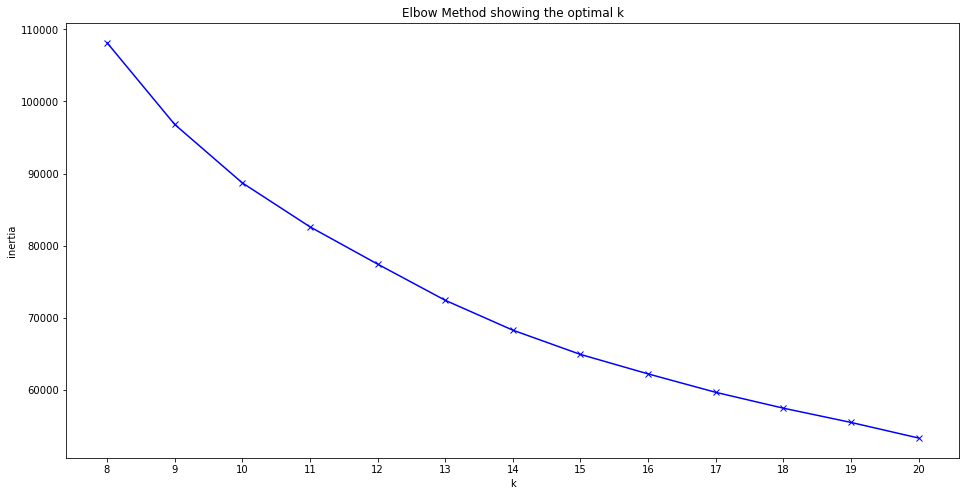

In [104]:
K = range(8, 21)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(song_base)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

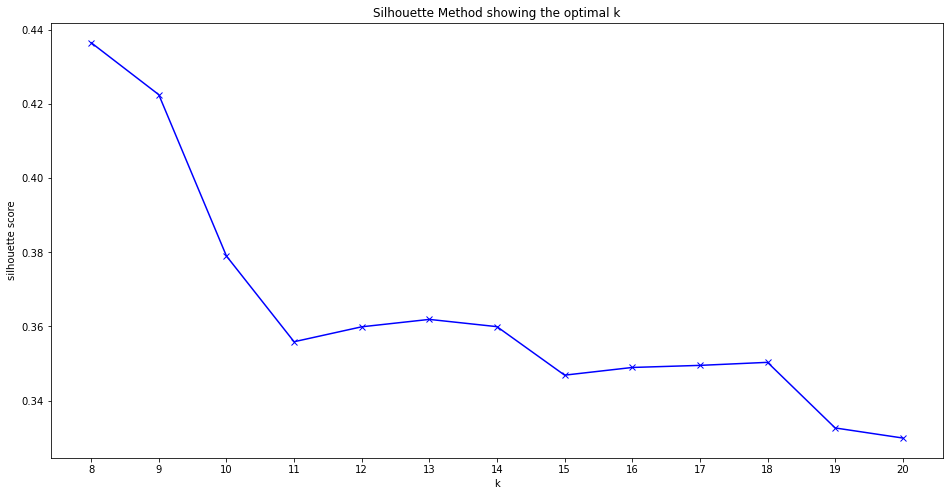

In [105]:
K = range(8, 21)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(song_base)
    silhouette.append(silhouette_score(song_base, kmeans.predict(song_base)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [106]:
#kmeans = KMeans(n_clusters=8, random_state=1234)
#kmeans.fit(X_prep)

In [107]:
kmeans = KMeans(n_clusters=13,
                init="random",
                n_init=3,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=2,
                tol=0,
                algorithm="full",
                random_state=1234)
kmeans.fit(song_base)
print(kmeans.inertia_)

90575.09571285211


In [108]:
kmeans = KMeans(n_clusters=9,
                init="random",
                n_init=10,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=2,
                tol=0,
                algorithm="full",
                random_state=1234)
kmeans.fit(song_base)
print(kmeans.inertia_)

117230.98593438894


In [109]:
# i decided to go with 9 clusters

In [110]:
clusters = kmeans.predict(song_base)
pd.Series(clusters).value_counts().sort_index()

0    172
1    231
2    151
3    286
4    201
5    252
6    252
7    258
8    386
dtype: int64

In [111]:
X_song_base = pd.DataFrame(song_base)
X_song_base["cluster"] = clusters
X_song_base

danceability    energy       key  loudness      mode  speechiness  \
0         2.052170 -0.207604 -1.168186 -0.488009  1.276935    -0.552355   
1         0.190093  1.314239 -0.459408 -0.488057 -1.464792     0.367764   
2         1.013408  1.792532 -1.372733 -0.488052 -0.368101    -0.359323   
3        -0.716092 -0.648627  0.230343 -0.487707 -1.190619    -0.650801   
4        -0.717092  1.550280  0.539541 -0.417385  1.551108    -0.931341   
...            ...       ...       ...       ...       ...          ...   
2012      0.584000  0.932000  1.000000 -3.501000  1.000000     0.333000   
2013      0.894000  0.892000  1.000000 -2.663000  1.000000     0.131000   
2014      0.637000  0.935000  0.000000 -2.467000  1.000000     0.107000   
2015      0.557000  0.992000  1.000000 -2.735000  1.000000     0.133000   
2016      0.446000  0.915000  9.000000 -6.221000  1.000000     0.141000   

      acousticness  instrumentalness  liveness   valence       tempo  cluster  
0        -0.445490          0.795738 -0.362191  0.834767   -1.476182        0  
1         0.162102          0.795738  0.014857 -0.435746   -0.047808        0  
2        -0.146347         -1.256696 -0.431149 -0.624247   -1.192935        0  
3         0.306222          0.795738 -0.365527  1.851709   -0.658812        0  
4         0.276972          0.795738  1.961265  1.664108    1.303684        0  
...            ...               ...       ...       ...         ...      ...  
2012      0.001060          0.002690  0.129000  0.211000   74.976000        1  
2013      0.087700          0.001670  0.052800  0.867000  110.041000        6  
2014      0.008570          0.003990  0.214000  0.470000  150.082000        5  
2015      0.001640          0.677000  0.091300  0.623000  150.011000        5  
2016      0.002810          0.000039  0.218000  0.402000  190.013000        4  

[2189 rows x 12 columns]

In [112]:
# getting the song name together with the features

In [113]:
song_artist=song_artist.reset_index()

In [114]:
X_song_base=X_song_base.reset_index()

In [115]:
#frames = [song_artist, X_song_base]

In [116]:
final_songs=pd.concat([song_artist, X_song_base], axis=1)

In [117]:
final_songs=final_songs.drop(['index'],axis=1)

In [118]:
final_songs

artist                                  song  \
0               Olivia Rodrigo                       Drivers License   
1                Ariana Grande                                 34+35   
2     Lil Tjay Featuring 6LACK                      Calling My Phone   
3                   The Weeknd                       Blinding Lights   
4                      Cardi B                                    Up   
...                        ...                                   ...   
2184            Kill The Noise   Like A Bitch - Kill The Noise Remix   
2185            Dillon Francis                                 Candy   
2186                  Rain Man  Habit - Dack Janiels & Wenzday Remix   
2187                Twin Moons                         First Contact   
2188                 Bleachers                    I Wanna Get Better   

      danceability    energy       key  loudness      mode  speechiness  \
0         2.052170 -0.207604 -1.168186 -0.488009  1.276935    -0.552355   
1         0.190093  1.314239 -0.459408 -0.488057 -1.464792     0.367764   
2         1.013408  1.792532 -1.372733 -0.488052 -0.368101    -0.359323   
3        -0.716092 -0.648627  0.230343 -0.487707 -1.190619    -0.650801   
4        -0.717092  1.550280  0.539541 -0.417385  1.551108    -0.931341   
...            ...       ...       ...       ...       ...          ...   
2184      0.584000  0.932000  1.000000 -3.501000  1.000000     0.333000   
2185      0.894000  0.892000  1.000000 -2.663000  1.000000     0.131000   
2186      0.637000  0.935000  0.000000 -2.467000  1.000000     0.107000   
2187      0.557000  0.992000  1.000000 -2.735000  1.000000     0.133000   
2188      0.446000  0.915000  9.000000 -6.221000  1.000000     0.141000   

      acousticness  instrumentalness  liveness   valence       tempo  cluster  
0        -0.445490          0.795738 -0.362191  0.834767   -1.476182        0  
1         0.162102          0.795738  0.014857 -0.435746   -0.047808        0  
2        -0.146347         -1.256696 -0.431149 -0.624247   -1.192935        0  
3         0.306222          0.795738 -0.365527  1.851709   -0.658812        0  
4         0.276972          0.795738  1.961265  1.664108    1.303684        0  
...            ...               ...       ...       ...         ...      ...  
2184      0.001060          0.002690  0.129000  0.211000   74.976000        1  
2185      0.087700          0.001670  0.052800  0.867000  110.041000        6  
2186      0.008570          0.003990  0.214000  0.470000  150.082000        5  
2187      0.001640          0.677000  0.091300  0.623000  150.011000        5  
2188      0.002810          0.000039  0.218000  0.402000  190.013000        4  

[2189 rows x 14 columns]

In [119]:
# creating a song recommendation tool

In [138]:
def hot_song():
    song =input("Give me a name of a song you like: ")
    if song in final_songs['song'].values:
        print("The song ", '\033[1m \033[92m' +song +  '\033[0m \033[0m ','is hot now, good choice!')
    else:
        print("Your song",'\033[1m \033[92m' + song +  '\033[0m \033[0m', " is not hot now!")
    return song

In [139]:
hot_song()


Give me a name of a song you like: Drive
The song   Drive   is hot now, good choice!


'Drive'

In [141]:
hot_song()


Give me a name of a song you like: Low
Your song  Low   is not hot now!


'Low'

In [ ]:
#('***\033[1m \033[92m' + result +  '\033[0m \033[0m ***') THIS makes the input pretty


In [140]:
user_input = hot_song()


Give me a name of a song you like: Listen
Your song  Listen   is not hot now!


In [ ]:
import random

In [199]:
def hot_song_recommender():
    song =input("Give me a name of a song you like: ")
    rc = pd.DataFrame(final_songs['song'].sample(n=3))
    if song in final_songs['song'].values:
        print("The song ", '\033[1m \033[94m' + song +  '\033[0m \033[0m ','is hot now, good choice!')
        print("You may also like this:", '\033[1m \033[94m' + rc +  '\033[0m \033[0m ')
    else:
        print("Your song",'\033[1m \033[94m' + song +  '\033[0m \033[0m', " is not hot now!")
        print("Maybe you should check this:", '\033[1m \033[94m' + rc +  '\033[0m \033[0m ')
    return song


In [200]:
hot_song_recommender()

Give me a name of a song you like: Drive
The song   Drive   is hot now, good choice!
You may also like this:                                                song
1934   Angel of Mine - Radio Mix  
1139                     Versace  
1678                    Old Ways  


'Drive'